#Ecuación diferencial de primer orden (Deducción método Euler)

\begin{equation}
\frac{dy}{d t} = f(t, y)
\end{equation}

\begin{equation}
\frac{y(t+\Delta t) - y(t)}{\Delta t} = f(t_i, y_i)
\end{equation}

\begin{equation}
y(t+\Delta t)= y(t_i) +\Delta t f(t_i, y_i)
\end{equation}


\begin{equation}
y_{i+1}= y_i +\Delta t f(t_i, y_i)
\end{equation}

# Actividad 01, Decamiento radioactivo
1. Resolver la siguiente ecuacion diferencial, empleando el metodo de Euler. Deberá generar el código en markdown con la explicación del método y las deducciones.

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}

\begin{equation}
\frac{\mathrm{d}N}{N}= -λ \mathrm{d}t
\end{equation}

Integro a ambos lados:

\begin{equation}
Ln(N)|_{N_0}^N = -λ t|_0^t
\end{equation}

\begin{equation}
Ln(N) - Ln(N_0) = -λt
\end{equation}

\begin{equation}
Ln(\frac{N}{N_0}) = -λt
\end{equation}

\begin{equation}
e^{Ln(\frac{N}{N_0})} = e^{-λt}
\end{equation}

\begin{equation}
\frac{N}{N_0} = e^{-λt}
\end{equation}

\begin{equation}
N = N_0e^{-λt}
\end{equation}

Por lo que queda N en términos de t:

\begin{equation}
N(t) = N_0e^{-λt}
\end{equation}

In [1]:
import scipy as sc
import matplotlib.pylab as plt
import numpy as np

In [2]:
N_0 = 100
lambd = 0.2
params = (N_0, lambd)

In [3]:
def fun_N(t, params):
  N_0 = params[0]
  lambd = params[1]
  N = N_0*np.exp(-lambd*t)
  return N

def dNdt(Ni,lambd):
  return -lambd*Ni

def euler_primerOrden(t, yi, deltaT, params):
  yi_1 = yi + deltaT*dNdt(yi,params[1])
  return yi_1

def euler(t,params):
  dt = t[1]-t[0]
  N = len(t)
  y = np.zeros(N)
  y[0] = params[0]
  for i in range(1, N):
    y[i] = euler_primerOrden(t[i-1],y[i-1],dt,params)
  return y


0.1


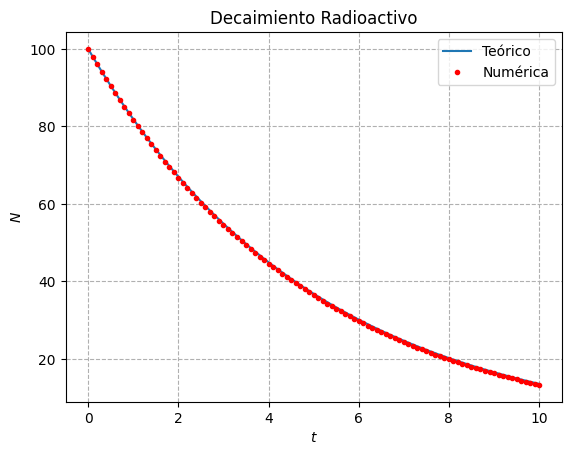

In [4]:
N=100
t0 = 0
tf = 10
dt = (tf-t0)/N
t = np.arange(0,10+dt,dt)

teo = fun_N(t,params)
deltaT = t[1]-t[0]
print(deltaT)
num = euler(t,params)

plt.plot(t,teo, label= "Teórico")
plt.plot(t,num, "r.", label="Numérica")
plt.xlabel("$t$")
plt.ylabel("$N$")
plt.title("Decaimiento Radioactivo")
plt.legend()
plt.grid(linestyle="--")

# Actividad 02, Oscilador armónico
2. Resolver la siguiente ecuación difirencial, empleando el metodo de Euler. interprete su resultado.

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}


\begin{equation}  
v = \frac{dx}{dt}
\end{equation}

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + b\frac{dx}{dt}=0
\end{equation}

\begin{equation}   
m \frac{d^2x}{dt^2}+ b\frac{dx}{dt}+kx =0
\end{equation}

\begin{equation}   
\frac{d^2x}{dt^2}+ \frac{b}{m}\frac{dx}{dt}+ \frac{kx}{m} =0
\end{equation}

\begin{equation}  
\gamma = \frac{k}{m}
\end{equation}  

\begin{equation}  
\omega^2 = \frac{b}{m}
\end{equation}  

\begin{equation}   
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}+ \gamma \frac{\mathrm{d}x}{\mathrm{d}t}+ \omega^2x\ =0
\end{equation}

\begin{equation}  
\frac{dx}{dt}  = v
\end{equation}

\begin{equation}  
\frac{\mathrm{d}^2x}{\mathrm{d}t^2} = \frac{dv}{dt}  = -\gamma v -\omega^2x
\end{equation}


Para el oscilador aromónico anterior, escribir un programa con extensión .py que permita dar, escribir la velocidad y la posición
como función del tiempo.

La ejecución del programa deberá ser de la siguiente forma:

python oscilador_armonico.py

al ejecutarse, el programa almacenará en memoría en el directorio data, la velocidad y la posición.

    data/velocidad.txt
    data/posicion.txt

Puede utlizar el siguiente código como guía:

```python
#!/usr/bin/env python3
def euler(x):
    
    return y, v

def save_file(path):
    return


if __name__=='__main__':
    y, v = euler(x)
    save_file(path)

```


In [5]:
import scipy as sc
import matplotlib.pylab as plt
import numpy as np

In [6]:
#Condiciones Iniciales
m = 1
k = 0
b = 20
params = (m,k,b)
y0 = 2
v0 = 0
t = np.linspace(0,10,10000)

In [7]:
def funcion_euler_segundo_orden(t, cond_ini, params):
  gamma = params[1]/params[0]
  omega_2 = params[2]/params[0]
  dydt = cond_ini[1]
  dvdt = -gamma*cond_ini[1] - omega_2*cond_ini[0]
  return np.array([dydt,dvdt])

def euler_segundoOrden(t, y0, v0, params):
  h = t[1]-t[0]
  N = len(t)
  cond_ini = np.array([y0,v0])
  y = np.zeros(N)
  v = np.zeros(N)
  y[0] = cond_ini[0]
  v[0] = cond_ini[1]
  for i in range(0, N-1):
    euler_so = funcion_euler_segundo_orden(t[i], cond_ini, params)
    y[i+1] = y[i] + h*euler_so[0]
    v[i+1] = v[i] + h*euler_so[1]
    cond_ini = np.array([y[i+1],v[i+1]])
  return y, v

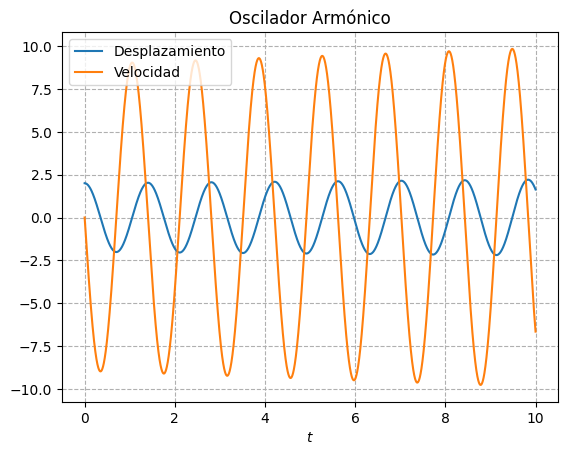

In [8]:
y, v = euler_segundoOrden(t,y0,v0,params)
plt.plot(t,y, label= "Desplazamiento")
plt.plot(t,v, label="Velocidad")
plt.xlabel("$t$")
plt.title("Oscilador Armónico")
plt.legend()
plt.grid(linestyle="--")